### <ins>GRADIENT DESCENT (A MORE INTUITIVE EXPLANATION)</ins>

#### <ins>OBJECTIVE</ins>
<p>Gradient descent is a core topic in machine learning and neural networks.

To have a thorough understanding of gradient descent, it is important to understand how, and why, its underlying mathematics work.

In this notebook I will present a step-by-step breakdown of the mathematics involved. I will also demonstrate how a simple linear regression model using gradient descent can be built from the ground up using Python. That way, we can really see the gradient descent algorithm in action.

I hope it can provide the reader with a clear, intuitive and yet technically accurate understanding of this topic. I will use only the necessary maths, and Python code with explanations.

This notebook documents my own understanding of the topic. Please let me know if you spot any errors or inaccuracies! Thank you.

#### <ins>PRE-REQUISITES</ins>

Some multivariable calculus, linear algebra and statistics will be involved but I will explain these where they occur, in a manner that can be more easily understood.<br>
For the code sections, some basic machine learning experience with Python will be helpful. 

The following resources are highly recommended for viewing/reading before continuing with the rest of this notebook:
1. <a href="https://www.youtube.com/watch?v=jc2IthslyzM&t=1195s" target="_blank">Mathematics of Gradient Descent - Intelligence and Learning (by Daniel Shiffman on The Coding Train)</a><br>
   This must-watch video on gradient descent made everything fall into place for me.
   
2. <a href="https://www.analyticsvidhya.com/blog/2021/10/everything-you-need-to-know-about-linear-regression" target="_blank">What is Linear Regression? (by Kavita Mali on Analytics Vidhya)</a><br>
    Excellent article on Linear Regression, which uses the gradient descent algorithm.

#### <ins>1. DEFINITIONS OF SOME BASIC TERMS</ins>

Let's start off with some basic but important terms:
    
1. **Gradient Descent:** Wikipedia defines it as *"a method for unconstrained mathematical optimization. It is a first-order iterative algorithm for finding a local minimum of a differentiable multivariate function."*<br>
That's quite a mouthful... In simpler terms, gradient descent is an algorithm that uses iterations (repetitive loops) to find optimal parameters that help reduce the error of machine learning predictions.

2. **Gradient of a straight line:** Also known as **slope**. It is sometimes defined as "rise over run", and is usually represented by the lowercase letter m:
     #### $m=\frac{\Delta y}{\Delta x}=\frac{y_2-y_1}{x_2-x_1}$

    <img src="https://d138zd1ktt9iqe.cloudfront.net/media/seo_landing_files/rise-over-run-1639029059.png" width=350 height=350/><br>
    &emsp;&emsp;&emsp;&emsp;&emsp;&emsp;Fig. 1.1 (Source: <a href="https://www.cuemath.com/geometry/rise-over-run/" target="_blank">cuemath.com</a>)
    
    <p style="color:brown">[ I will keep to the term <b>slope</b> for consistency. ]</p>

    The slope can be negative or positive:<br><br>

    <img src="https://www.mathsisfun.com/geometry/images/slope-neg.svg" width=150 height=150/>
    <img src="https://www.mathsisfun.com/geometry/images/slope-0.svg"  width=150 height=150/>
    <img src="https://www.mathsisfun.com/geometry/images/slope-pos.svg" width=150 height=150/><br>
   
    Fig. 1.2 (Source: <a href="https://www.mathsisfun.com/gradient.html" target="_blank">mathsisfun.com</a>)<br>

4. **Equation of a straight line (in slope-intercept form):**
    #### $y = mx + b$</h4>
    where:
    + $m$ is the slope of the line.
    + $b$ is the y-intercept (i.e. the $y$ value where the straight line meets the Y-axis).
    <p style="color:brown">[ I will refer to this simply as <b>intercept</b> for brevity. ]</p>

#### <ins>2. DEFINING THE CONTEXT</ins>

To keep things simple, I will demonstrate the use of gradient descent within the context of a *machine learning model*. (This is less complex than its use in a neural network.)

For the dataset, we will use the following one on Kaggle: <a href="https://www.kaggle.com/datasets/ashydv/advertising-dataset/data" target="_blank">Advertising dataset</a>

Let's have a quick look at the top 5 records from this dataset:
<p style="color:brown">[ We'll use some Python code for this but I will consolidate the code and present it with explanatory comments later. For now, simply just run the code to view the data and visualisations. ]</p>

In [16]:
import pandas as pd

# Reading from a URL that contains the same Kaggle 'Advertising' dataset.
df_data = pd.read_csv(r'https://raw.githubusercontent.com/prog4321/gradient_descent/main/data/advertising.csv')

print(df_data.head())
print(f'\nNo. of rows in dataset: {len(df_data.index)}')

      TV  Radio  Newspaper  Sales
0  230.1   37.8       69.2   22.1
1   44.5   39.3       45.1   10.4
2   17.2   45.9       69.3   12.0
3  151.5   41.3       58.5   16.5
4  180.8   10.8       58.4   17.9

No. of rows in dataset: 200


The columns for 'TV', 'Radio' and 'Newspaper' represent the respective media channel's advertising budget in thousands of dollars; 'Sales' represents the sales volume of the product in thousands of units. There are a total of 200 rows to represent the corresponding data for 200 different markets.

<p style="color:brown"> 
[ NB: The dataset above from Kaggle is based on the 'Advertising.csv' dataset from the book <i>'An Introduction to Statistical Learning - with Applicatons in R'</i> (commonly abbreviated to 'ISLR'), published by Springer. The original ISLR dataset can be found <a href="https://www.statlearning.com/resources-first-edition" target="_blank">here</a>. Do note that there are some differences between the Kaggle and ISLR datasets - the Kaggle version does not include the index column of the ISLR version, and <i>contains some modified values in the 'Sales' column</i>. Nevertheless, the Kaggle dataset remains a good choice for the purpose of this notebook. I will refer to the Kaggle dataset as the Advertising dataset from here on. ]
</p>

Naturally when you have data like this, you may want to see if there's some correlation between the different media channels and sales. So let's do some visualisation:

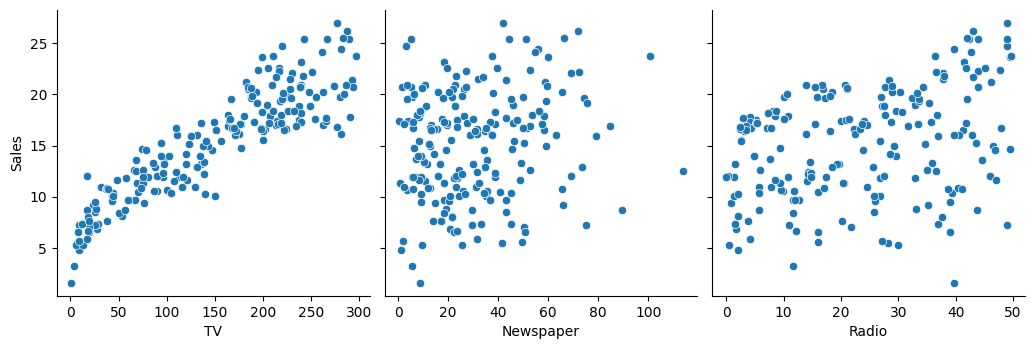

In [17]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.pairplot(df_data, x_vars=['TV', 'Newspaper', 'Radio'],
            y_vars='Sales', height=3.5, kind='scatter')
plt.show()

<p style="color:brown">[ For brevity, I will refer to 'TV advertising budget' as <b>TV</b> and 'Sales volume' as <b>Sales</b>. ]</p>

Visually, you can tell there is a fairly strong relationship between TV and Sales, more so than with the other media channels. As TV increases, Sales increase proportionally. (For simplicity, I will exclude the Newspaper and Radio data from our consideration.)

Let's say I am the manager for a certain market. If I invest $X in TV, how many units of the product can I expect to sell?

To answer this question, let us construct a machine learning model (one that uses gradient descent) that can use TV values to predict Sales.

#### <ins>3. CHOOSING THE MACHINE LEARNING MODEL</ins>

What would be a suitable machine learning model?

Let's look at our context more closely:
+ There is a variable that we *already know* (TV). We want to use this variable to *predict* another variable (Sales). So we are dealing with just 2 variables. In machine learning (ML) lingo, we'll need a model that only needs to handle **2 dimensions**.
+ Because the Sales values in our dataset are considered 'continuous' data (as opposed to 'categorical' data like flower species), we'll need a model for **regression** instead of *classification*.
+ Increases in TV are *directly proportional* to increases in Sales. In other words, there is a **linear relationship** between them.
+ We need a model which uses the gradient descent algorithm.<br>

Given these considerations, **Simple Linear Regression (SLR)** is a suitable machine learning model for our needs. *It is a 2-dimensional model for running predictions on continuous data (i.e. regression), for variables that have linear relationships.* It also uses the gradient descent algorithm.

We can place the variables that we already know (referred to as **independent variables**) on the X-axis. This would be TV. On the Y-axis, we have the variables that we want to predict (referred to as **dependent variables**). This would be Sales.

In ML lingo, TV would be referred to as the **feature**, and Sales would be the **target**.

Our model would aim to create a straight line (the "line of best fit") that goes in the direction of the linear relationship between TV and Sales. You can see a graph of this in Fig. 3.1. The blue dots represent the 200 data points (created by pairing the TV and Sales values for each row) from our dataset. The red line is the line of best fit.<br>
<img src="\images\linear_regression_tv_sales.png" width=400 height=400/><br>
&emsp;&emsp;&emsp;&emsp;Fig. 3.1 (Source: prog4321)

#### <ins>4. MORE ON SIMPLE LINEAR REGRESSION (SLR)</ins>

<img src="\images\actual_vs_predicted_y_values.png" width=320 height=320/><br>
&emsp;&emsp;&emsp;&emsp;Fig. 4.1 (Source: prog4321)

If you refer to the Fig. 4.1, you can see that there are data points which do not fall perfectly on the line of best fit. This is to be expected of any real-life dataset.

From our Advertising dataset, we already know the **actual** TV and Sales ($x$ and $y$) values of the 200 data points.

We want the SLR model to **predict** a Sales value $\hat{y}_i$ when given a TV value $x_i$.

<p style="color:brown">[ 1. $\hat{y}$ is pronounced as "y hat". <br>2. Think of the $i$ in the subscript as the index number of the row we are evaluating at the moment. For e.g. if we are evaluating the 3rd row of the dataset, its $x$ value would be indicated as $x_3$ and its actual $y$ value as $y_3$. ]</p>

How does the SLR model do this prediction?

The SLR model uses its line of best fit for this. Since the line of best fit is a straight line, it will follow the equation $y = mx + b$. Thus, we can use the following equation to find the predicted Sales value $\hat{y}_i$ :

#### $\hat{y_i} = mx_i + b$

<p style="color:brown">[ NB: In the context of linear regression, you may encounter this equation written as $\hat{y_i} = \beta_0 + \beta_1x_i$ , where $\beta_0$ represents the intercept ($b$) and $\beta_1$ represents the slope ($m$). For the purpose of this notebook I will keep to $\hat{y_i} = mx_i + b$ for ease of visualisation as most readers will be used to this from algebra classes. ]</p>

You may also notice in Fig. 4.1 that there can be a discrepancy between the actual $y_i$ value and the predicted $\hat{y_i}$ value for a data point. This discrepancy is an error known as the <b>residual</b> (usually represented by the lowercase Greek letter epsilon or the lowercase letter e) and it can be expressed by the following equation:
#### $\epsilon_{i} = y_i - \hat{y}_i$
where:
+ **$y_i$** is the actual $y$ value of the data point
+ **$\hat{y}_i$** is the predicted $y$ value of the data point

<p style="color:blue">The SLR model will position the line of best fit so that the errors between the actual and predicted $y$ values of all data points are minimised.</p> The gradient descent algorithm handles this within the SLR model, by iteratively adjusting the slope and intercept of the line of best fit.

#### <ins>5. THE COST FUNCTION</ins>

We saw above how the error (i.e. residual) for a single data point is calculated. But how do we calculate how much error our model has, as a whole?
    
We use something known as the **cost function**. And naturally, we want to minimise the value (i.e. result) of the cost function.

For SLR, the cost function known as **Mean Squared Error (MSE)** is usually used:

#### $MSE = \frac {1}{N} \sum \limits _{i=1} ^{N} (y_i - \hat{y}_i)^2$

Let us break this down a little:
+ You may have already noticed that it is the **residual** (i.e. $y_i - \hat{y}_i$) inside the parentheses.
+ Also note that the residual is **squared**.<br>

Let's talk about $\sum \limits _{i=1} ^{N}$ :
+ $\sum$ (the uppercase Greek letter sigma) is the **summation** symbol. This means we sum up the terms that appear *after* this symbol.<br><br>
+ What appears *below* $\sum$ is the **lower limit of summation**.<br>
  This represents the *starting point* of the summation. If $i=1$ appears below $\sum$ that means our summation starts from the 1st row of the dataset.<br><br>
+ What appears *above* $\sum$ is the **upper limit of summation**.<br>
  $N$ represents the total number of rows in our dataset. If $N$ appears above $\sum$ that means our summation goes up to the last row of the dataset.
  <p style="color:brown">[ Some sources use the lowercase letter n for this but I have chosen to go with the uppercase letter N here, as we will also use the lowercase Greek letter eta later on, which looks similar to a lowercase letter n. ]</p>
  
We can expand the MSE equation to provide more clarity:

#### $MSE = \frac {1}{N} \sum \limits _{i=1} ^{N} (y_i - \hat{y}_i)^2$
#### &emsp;&emsp;&emsp;$= \frac {1}{N} \bigg ((y_1 - \hat{y}_1)^2 + (y_2 - \hat{y}_2)^2 + (y_3 - \hat{y}_3)^2 +  ...  + (y_N - \hat{y}_N)^2 \bigg )$

You can see that we essentially take the residual (i.e. error) for each row in the dataset and square the residuals. We sum those squared residuals, and finally calculate its mean (dividing by the number rows in the dataset). Hence, the term Mean Squared Error.

Why do we need to square the residuals? If you refer to Fig. 4.1, you can notice there are data points *above* the line of best fit, and data points *below* the line of best fit. If you calculate the residual for a data point above the line of best fit, it would be a positive value, as the actual $y_i$ is *larger* than the predicted $\hat{y}_i$. Conversely, the residual for a data point below the line of best fit would be negative.

If we were to simply sum the residuals for all data points without first squaring them, we may not get a fair representation of the error in the model. As negative residuals can "cancel out" positive ones, resulting in an MSE that is very small. This can  give a misleading impression that there is very little error in the model. But if we square the residuals, we remove this cancellation effect, resulting in a fairer representation of the error.

#### <ins>6. MORE ON THE COST FUNCTION</ins>

At this point, let's restate the equation for calculating the predicted $\hat{y_i}$:
#### $\hat{y_i} = mx_i + b$ <sub>(Eq. 6.1)</sub><br>

And our Mean Squared Error (MSE):
#### $MSE = \frac {1}{N} \sum \limits _{i=1} ^{N} (y_i - \hat{y}_i)^2$ <sub>(Eq. 6.2)</sub><br>

We'll substitute the right hand side (RHS) of Eq. 6.1 into Eq. 6.2 to show the constituent terms more explicitly:
#### $MSE = \frac {1}{N} \sum \limits _{i=1} ^{N} (y_i - (mx_i + b))^2$
#### &emsp;&emsp;&emsp;$= \frac {1}{N} \sum \limits _{i=1} ^{N} (y_i - mx_i - b)^2$ <sub>(Eq. 6.3)</sub><br>

**We want to position the line of best fit so that the errors between the actual and predicted $y$ values of all data points are minimised, which in turn produces the lowest MSE.**

To achieve this, we need to be able to *adjust* the **slope** $m$ and **intercept** $b$ of the line of best fit. To make that easier, we treat the TV and Sales ($x$ and $y$) values as constant values. You can see below a simple visualisation of how different $m$ and $b$ values can affect the line of best fit:

<img src="\images\different_m_b_values.png" width=250 height=250/>
Fig. 6.1 (Source: prog4321)<br><br>

Let's rewrite the MSE equation a little to better reflect this perspective of doing $m$ and $b$ adjustments. We'll rename it as the cost function $J$, and you can see in the parentheses at the left hand side (LHS) of the equation that it accepts $m$ and $b$ as *input variables*:

#### $J (m, b) = \frac {1}{N} \sum \limits _{i=1} ^{N} (y_i - mx_i - b)^2$ <sub>(Eq. 6.4)</sub>

<p style="color:blue">Our goal is to find the optimal pair of $m$ and $b$ values that produce the lowest $J$ value (i.e. MSE). The same $m$ and $b$ values would naturally also produce the optimal line of best fit.</p><br>

It can help to think of all this visually in the 3D space. Imagine a 3-dimensional graph consisting of axes X, Y and Z. The slope $m$ is plotted on the X-axis, and the intercept $b$ on the Y-axis. Think of the $m$-$b$ axes as a flat horizontal plane. If we were to computationally generate a lot of values for $m$ and $b$ (while treating the TV and Sales values as constant values), we can then plot the resultant values for $J$ (i.e MSE) on the Z-axis. This will produce a 3-dimensional "surface" like a piece of paper, having a certain shape, that represents MSE values for the corresponding $m$ and $b$ values:

<img src="\images\3d_slope_intercept_mse_view1.png" width=350 height=350/>
Fig. 6.2A (Source: prog4321)<br><br>

<img src="\images\3d_slope_intercept_mse_view2.png" width=350 height=350/>
Fig. 6.2B: The same 3D plot but viewed from a different angle. Note the curvature at the bottom. (Source: prog4321)<br><br>

You can see it has a parabolic ("U") shape. Think of it as a **valley**. Say we currently have a pair of $m$ and $b$ values that generate a $J$ (MSE) value, and we represent this with the green dot in Fig. 6.3. We'd want to move it to the red dot's position at the bottom of the valley, because that's where the lowest MSE values are found. The clever gradient descent algorithm helps us find the fastest path down the valley. But to properly understand how it works, we'd need to do some calculus first.

<img src="\images\3d_valley_start_end_view1.png" width=350 height=350/>
Fig. 6.3 (Source: prog4321)<br><br>

#### <ins>7. CALCULUS: FINDING DERIVATIVES</ins>

You can see from Fig. 6.2A/B that we are dealing with a 3-dimensional curved surface. We'll gradually work towards the mathematics behind that, but for now let's work on a simpler (but similar) 2-dimensional curve.

<img src="https://www.storyofmathematics.com/wp-content/uploads/2022/07/x-square-graph.png.webp" width=380 height=380/><br>
Fig. 7.1 (Source: <a href="https://www.storyofmathematics.com/y-=-x-2/" target="_blank">storyofmathematics.com</a>)

The diagram above is a graph of $y = x^2$.

We can say "$y$ is a **function** of $x$" ( written as $y=f(x)$ ) and define this function as:<br>
#### $f(x) = x^2$

This is a *single variable function*, as it has only 1 input variable in the parentheses at the LHS. The $y$ value ( i.e. $f(x)$ ) is simply the square of the $x$ value.

*A single variable function can be plotted as a continuous line on a 2-dimensional graph.* This line can be curved or straight, depending on the function. The input variable is placed on the X-axis, and the result of the function (from the operation(s) at the RHS) is placed on the Y-axis.

We know how to find the $y$ value of the above function easily. But can we also calculate the slope of that curved line that is generated by this function? More specifically, can we calculate the slope *at a point* of that curved line? (The reason why we want to do so will become clear later on.)

To do that, we will need to use derivatives in calculus. If you are not already familiar with this topic, please read through the following two excellent lessons and try to understand them well before continuing:
+ <a href="https://www.mathsisfun.com/calculus/derivatives-introduction.html" target="_blank">Introduction to Derivatives</a>
+ <a href="https://www.mathsisfun.com/calculus/derivatives-rules.html" target="_blank">Derivative Rules</a>

***The derivative of a function tells us the slope (or rate of change) at any point of the function.*** Another way of looking at it: it tells us, at any point of that function, how much the $y$ value changes per a unit change in the $x$ value.

We will go through two derivative rules that will be critical in the mathematics later on.

##### 7.1 POWER RULE

Power is another term for the exponent. So the power of $x^2$ is 2.<br>
Let's use our earlier equation again:<br>
#### $f(x) = x^2$

To find the derivative of this function, we can apply the Power Rule.<br>
The Power Rule tells us to *"multiply by the power, then reduce the power by 1"*.
    
<img src="https://www.mathsisfun.com/calculus/images/power-rule.svg" width=50 height=50/><br>
Fig. 7.2 (Source: <a href="https://www.mathsisfun.com/calculus/power-rule.html" target="_blank">mathsisfun.com</a>)

Now, let's use the Power Rule to find $\frac{d}{dx} x^2$ ( i.e. the derivative of $x^2$ ) :

#### $\frac{df}{dx} = \frac{d}{dx} x^2$ 
#### &emsp;&emsp;$= 2 \cdot x^{2-1}$
#### &emsp;&emsp;$=2x^1$
#### &emsp;&emsp;$=2x$
*We can say "the derivative of $x^2$ is $2x$".* This means the *slope* at any point of the function $f$ is equal to $2x$.

Let's try to visualise what that means.

For e.g. at $x=2$, we first want to find the corresponding $y$ value:<br>
#### $f(x) = x^2$
#### &emsp;&emsp;$= 2^2$
#### &emsp;&emsp;$= 4$<br>

That means when $x=2$, $y = 4$. We can represent this point as (2,4) in Cartesian coordinates on the graph.

So, what is the slope of the curved line (i.e. the slope of the function) at this point (2,4)?

Since $x=2$, and we saw earlier that the slope of the function is $2x$, then:<br>
#### $Slope = 2x$
#### &emsp;&emsp;&emsp;$= 2 \cdot 2$
#### &emsp;&emsp;&emsp;$= 4$<br>

You can visualise this in the following graph:

<img src="https://www.mathsisfun.com/calculus/images/slope-x2-2.svg" width=150 height=150/><br>
Fig. 7.3 (Source: <a href="https://www.mathsisfun.com/calculus/derivatives-introduction.html" target="_blank">mathsisfun.com</a>)<br><br>

What does a slope of 4 at point (2,4) tell us? If we were to draw a straight line tangential to the curve at point (2,4), the slope of this line is so steep that for every unit we move to the right, we'd need to move *4* units in the upwards direction.

##### 7.2 CHAIN RULE

The Chain Rule can be written as:<br>
#### $\frac {dy}{dx} = \frac {dy}{du} \frac {du}{dx}$

We'll illustrate how the Chain Rule works by using an example with a different equation:

#### $f(x) = (x - 2)^2$<br>

Find $\frac{d}{dx} (x - 2)^2$.

Think of this as having 2 components.<br>
The 1st component being $(x - 2)$, and the 2nd component being the square of the first component.<br><br>

We first set an equation to represent the 1st component:<br>
Let $u = x - 2$<br>
You can see that we are expressing $u$ in terms of $x$.<br>
This will let us solve for the derivative of $u$ with respect to $x$ ( $\frac {du}{dx}$ ) later on.<br><br>

Now let's set another equation to represent the 2nd component, and remember we want the 2nd component to be the square of the first component:<br>
Let $y = u^2$<br>
We express $y$ in terms of $u$.<br>
This will let us solve for the derivative of $y$ with respect to $u$ ( $\frac {dy}{du}$ ) later on.<br><br>

**Notice there's a common link between these 2 equations! And that common link is $u$.**<br><br>

We are now ready to solve for $\frac{d}{dx} (x - 2)^2$ : 

#### $\frac {df}{dx} = \frac{d}{dx} (x - 2)^2$
#### &emsp;&emsp;$= \frac {dy}{du} \frac {du}{dx}$<br>
#### &emsp;&emsp;$=\frac{d}{du} u^2 \cdot \frac{d}{dx}(x - 2)$
&emsp;&emsp;&emsp;&emsp;For $\frac{d}{du} u^2$ : we use the Power Rule to differentiate $u^2$ to $2u$.<br><br>
&emsp;&emsp;&emsp;&emsp;For $\frac{d}{dx}(x - 2)$ : the $x$ differentiates to 1 as the derivative with respect to itself is 1;<br>
&emsp;&emsp;&emsp;&emsp;the $2$ differentiates to 0 as it is a constant.<br>
#### &emsp;&emsp;$=2u \cdot (1 - 0)$
#### &emsp;&emsp;$=2u \cdot 1$
#### &emsp;&emsp;$=2u$
&emsp;&emsp;&emsp;&emsp;Substitute RHS of $u = x - 2$ into the equation as we need to express the answer in terms of $x$:
#### &emsp;&emsp;$=2 (x - 2)$
#### &emsp;&emsp;$=2x - 4$<br>

*We can say "the derivative of $(x - 2)^2$ is $2x - 4$".* This means the slope at any point of the function $f$ is equal to $2x - 4$.

<p style="color:brown">[ We now know how to use the Power Rule and the Chain Rule to approach finding the slope (rate of change) at any point of a single variable function. ]</p>

#### <ins>8. CALCULUS: FINDING PARTIAL DERIVATIVES</ins>

<p style="color:brown">[ Functions that have more than one input variable at the LHS are referred to as <i>multivariable</i> functions. For clarity, I will use the term <b>slope</b> when referring to the rate of change of single variable functions, and <b>gradient</b> when referring to the rate of change of multivariable functions. ]

We saw earlier how we can calculate the slope (rate of change) at a point of a single variable function.

Now, let's move towards finding the gradient (rate of change) at a point of a *multivariable* function with 2 input variables. This requires something called **partial derivatives**. If you're not already familiar with this, please first read this excellent primer on <a href="https://www.mathsisfun.com/calculus/derivatives-partial.html" target="_blank">Partial Derivatives</a> before proceeding with the rest of this notebook.

##### 8.1 APPROACH

Finding the partial derivatives of a multivariable function in order to calculate its gradient is actually quite similar to finding the derivative of a single variable function in order to calculate its slope.

Say we have a multivariable function $J(m, b)$. To find its gradient $\nabla J(m, b)$, we have to:

1. Find the partial derivative of $J$ with respect to $m$ ( we write this as $\frac {\partial J}{\partial m}$ ).
    + Treat all variables beside $m$ as constant values.
    + Find the derivative of $J$ with respect to $m$ while doing so.
    + This tells us how the value of $J$ changes, if $m$ changes by the tiniest amount and all other variables are held constant.<br><br>
  
2. Find the partial derivative of $J$ with respect to $b$ ( we write this as $\frac {\partial J}{\partial b}$ ).
    + Treat all variables beside $b$ as constant values.
    + Find the derivative of $J$ with respect to $b$ while doing so.
    + This tells us how the value of $J$ changes, if $b$ changes by the tiniest amount and all other variables are held constant.<br>

We can notate the gradient like this, putting those two partial derivatives into a column vector:
#### $\nabla J(m, b) = \left [\begin{matrix} \frac {\partial J}{\partial m} \\ \frac {\partial J}{\partial b}\end{matrix}\right ]$

*( $\nabla$ is the nabla symbol but usually pronounced as "del" in this context. )*

##### 8.2 EXAMPLE

Let's solidify the notion of partial derivatives with an example that is relatively easy to visualise (as illustrated in the mathsisfun.com page on partial derivatives):

<img src="https://www.mathsisfun.com/geometry/images/cylinder-dimensions.svg" width=150 height=150><br>
Fig. 8.1 (Source: <a href="https://www.mathsisfun.com/calculus/derivatives-partial.html" target="_blank">mathsisfun.com</a>)<br>

The volume of a cyclinder is given by the multivariable function:
#### $f(r,h) = \pi r^2h$

The function takes radius $r$ and height $h$ as input values, and then calculates the volume of the cyclinder.

Let's say now we want to figure out how much a tiny change in the height of the cyclinder will affect its volume. That means we want to find the partial derivative of $f$ with respect to $h$ ( written as $\frac {\partial f}{\partial h}$ ).

We'd need to treat all other variables beside $h$ as if they are constant values. In other words, we treat $\pi$ and $r$ as constants.<br>

#### $\frac {\partial f}{\partial h} = \frac {\partial}{\partial h} \pi r^2h$
&emsp;&emsp;&emsp;&emsp;$h$ differentiates to 1 as the derivative with respect to itself is 1:<br>
#### &emsp;&emsp;$= \pi r^2 \cdot 1$<br>
#### &emsp;&emsp;$= \pi r^2$<br>

This tells us that, if only the height of the cyclinder changes by the tiniest amount, and its radius remains the same, then the volume of the cyclinder changes by the amount of $\pi r^2$.

##### 8.3 COMPARING SINGLE VARIABLE AND MULTIVARIABLE FUNCTIONS

+ A single variable function (1 input variable) can be plotted as a continuous line on a 2-dimensional graph:<br>

  <img src="https://www.storyofmathematics.com/wp-content/uploads/2022/07/x-square-graph.png.webp" width=380 height=380/><br>
  Fig. 7.1 (Source: <a href="https://www.storyofmathematics.com/y-=-x-2/" target="_blank">storyofmathematics.com</a>)<br>

  And we use can derivatives to find the slope at any point of the curve generated by the function.<br><br>

+ A multivariable function with 2 input variables can be plotted as a 3D surface on a 3-dimensional graph:<br>
  <img src="\images\3d_slope_intercept_mse_view1.png" width=350 height=350/><br>
  Fig. 6.2A (Source: prog4321)<br>

  And we can use partial derivatives to find the gradient at any point of the 3D surface generated by the function.

#### <ins>9. FINDING THE GRADIENT OF THE COST FUNCTION</ins>

Please watch this excellent video by Grant Sanderson for Khan Academy before going further:<br>
<a href="https://www.khanacademy.org/math/multivariable-calculus/multivariable-derivatives/gradient-and-directional-derivatives/v/gradient" target="_blank">Gradient (of a multivariable function)</a>

Why do we need to know about the gradient of a multivariable function? Because the cost function $J$ is a multivariable function (with 2 input variables $m$ and $b$) and because its **gradient points in direction of steepest ascent**.

Remember our valley analogy. If the gradient of $J$ points in the direction of steepest ascent, then moving in the *opposite direction* would be the fastest way towards the bottom of the valley.

So let's find the gradient of $J$:
#### $\nabla J(m, b) = \left [\begin{matrix} \frac {\partial J}{\partial m} \\ \frac {\partial J}{\partial b}\end{matrix}\right ]$<br>

<p style="color:brown">[ I will refer to the RHS of this equation as the <b>gradient vector</b>.<br>
<i>If you are unsure why the gradient is written like this, please watch the Khan Academy video mentioned above before proceeding.</i> ]</p>

Let's restate some of the relevant earlier equations here for ease of reference:

#### $J (m, b) = \frac {1}{N} \sum \limits _{i=1} ^{N} (y_i - mx_i - b)^2$ <sub>(Eq. 6.4)</sub>

#### $\epsilon_{i} = y_i - \hat{y}_i$
&emsp;&emsp;&emsp;Substitute RHS of $\hat{y_i} = mx_i + b$ into the equation:<br>
#### &emsp;$= y_i - (mx_i + b)$
#### &emsp;$= y_i - mx_i - b$ <sub>(Eq. 9.1)</sub>

##### 9.1 SOLVE FOR THE TOP COMPONENT IN THE GRADIENT VECTOR

We will first look at the top component ( $\frac {\partial J}{\partial m}$ ) of the gradient vector. This is the partial derivative of $J$ with respect to $m$.<br>
It tells us how much $J$ changes, if $m$ changes for the tiniest amount and all other variables are held constant.<br>

We can express $\frac {\partial J}{\partial m}$ as:

#### $\frac {\partial J}{\partial m} = \frac {\partial}{\partial m} \frac {1}{N} \sum \limits _{i=1} ^{N} (y_i - mx_i - b)^2$
&emsp;&emsp;&emsp;&emsp;Using the Chain Rule:
#### &emsp;&emsp;$= \frac {\partial J}{\partial \epsilon} \frac {\partial \epsilon}{\partial m}$<br><br>

For clarity, we will approach these 2 terms ( $\frac {\partial J}{\partial \epsilon}$ and $\frac {\partial \epsilon}{\partial m}$ )individually.<br><br>

+ To solve for $\frac {\partial J}{\partial \epsilon}$, we first need an equation for $J$ expressed in terms of $\epsilon$.
  We can get this quite easily:
  #### $J (m, b) = \frac {1}{N} \sum \limits _{i=1} ^{N} (y_i - mx_i - b)^2$
  &emsp;&emsp;&emsp;&emsp;&emsp;&emsp;Substitute LHS of Eq. 9.1 into the equation:
  #### $J (m, b) = \frac {1}{N} \sum \limits _{i=1} ^{N} \epsilon_i^2$ <sub>(Eq. 9.2)</sub>

  Thus:
  #### $\frac {\partial J}{\partial \epsilon} = \frac {\partial}{\partial \epsilon} \frac {1}{N} \sum \limits _{i=1} ^{N} \epsilon_i^2$
  #### &emsp;&emsp;$= \frac {1}{N} \frac {\partial}{\partial \epsilon} \sum \limits _{i=1} ^{N} \epsilon_i^2$  
  &emsp;&emsp;&emsp;&emsp;Using the Power Rule, $\epsilon_i^2$ differentiates to $2 \epsilon_i$ :
  #### &emsp;&emsp;$= \frac {1}{N} \sum \limits _{i=1} ^{N} 2 \epsilon_i$  
  #### &emsp;&emsp;$= \frac {2}{N} \sum \limits _{i=1} ^{N} \epsilon_i$ <sub>(Eq. 9.3)</sub><br><br>

+ To solve for $\frac {\partial \epsilon}{\partial m}$, we need an equation for $\epsilon$ expressed in terms of $m$.
  We already have this in Eq. 9.1:
  #### $\epsilon_{i} = y_i - mx_i - b$ <sub>(Eq. 9.1)</sub><br>
  
  Thus:
  #### $\frac {\partial \epsilon}{\partial m} = \frac {\partial}{\partial m} (y_i - mx_i - b)$
  &emsp;&emsp;&emsp;&emsp;$m$ differentiates to 1 as the derivative with respect to itself is 1;<br>
  &emsp;&emsp;&emsp;&emsp;$y_i$ and $b$ both differentiate to 0 as they are treated as constants:
  #### &emsp;&emsp;$= 0 - (1 \cdot x_i) - 0$
  #### &emsp;&emsp;$= - x_i$ <sub>(Eq. 9.4)</sub><br><br>

We are now ready to solve for the top component ( $\frac {\partial J}{\partial m}$ ) of the gradient vector:

#### $\frac {\partial J}{\partial m} = \frac {\partial}{\partial m} \frac {1}{N} \sum \limits _{i=1} ^{N} (y_i - mx_i - b)^2$
&emsp;&emsp;&emsp;&emsp;Using the Chain Rule:
#### &emsp;&emsp;$= \frac {\partial J}{\partial \epsilon} \frac {\partial \epsilon}{\partial m}$
&emsp;&emsp;&emsp;&emsp;Substitute RHS of Eq. 9.3 and Eq. 9.4 into the equation:
#### &emsp;&emsp;$=\frac {2}{N} \sum \limits _{i=1} ^{N} \epsilon_i \cdot - x_i$
#### &emsp;&emsp;$= - \frac {2}{N} \sum \limits _{i=1} ^{N} \epsilon_i x_i$
&emsp;&emsp;&emsp;&emsp;Substitute RHS of $\epsilon_{i} = y_i - \hat{y}_i$ into the equation for clarity:
#### &emsp;&emsp;$= - \frac {2}{N} \sum \limits _{i=1} ^{N} (y_i - \hat{y}_i) x_i$ <sub>(Eq. 9.5)</sub><br><br>

<p style="color:brown">[ NB: I have explicitly expressed the $\epsilon$ term as $(y_i - \hat{y}_i)$ in Eq. 9.5 to avoid ambiguity, as some sources indicate $\epsilon = \hat{y}_i - y_i$. Using the latter equation will involve switching some -ve and +ve signs in the equations we used upstream and further down. To keep things simple, I will keep to $\epsilon = y_i - \hat{y}_i$. ]</p>

We have now figured out the top component ( $\frac {\partial J}{\partial m}$ ) of the gradient vector .

##### 9.2 SOLVE FOR THE BOTTOM COMPONENT IN THE GRADIENT VECTOR

Now let's solve for the bottom component ( $\frac {\partial J}{\partial b}$ ) of the gradient vector. It is similar to solving for the top component.
#### $\frac {\partial J}{\partial b} = \frac {\partial}{\partial m} \frac {1}{N} \sum \limits _{i=1} ^{N} (y_i - mx_i - b)^2$
&emsp;&emsp;&emsp;&emsp;Using the Chain Rule:
#### &emsp;&emsp;$= \frac {\partial J}{\partial \epsilon} \frac {\partial \epsilon}{\partial b}$<br><br>

From Eq. 9.3, we already know what $\frac {\partial J}{\partial \epsilon}$ will evaluate to.<br>
So let's just look at $\frac {\partial \epsilon}{\partial b}$ :
#### $\frac {\partial \epsilon}{\partial b} = \frac {\partial}{\partial b} (y_i - mx_i - b)$
&emsp;&emsp;&emsp;&emsp;$b$ differentiates to 1 as the derivative with respect to itself is 1;<br>
&emsp;&emsp;&emsp;&emsp;$y_i$, $m$ and $x_i$ and all differentiate to 0 as they are treated as constants ]<br>
#### &emsp;&emsp;$= 0 - 0 - 1$
#### &emsp;&emsp;$= - 1$ <sub>(Eq. 9.6)</sub><br><br>

We are now ready to solve for the bottom component ( $\frac {\partial J}{\partial b}$ ) of the gradient vector:
#### $\frac {\partial J}{\partial b} = \frac {\partial}{\partial b} \frac {1}{N} \sum \limits _{i=1} ^{N} (y_i - mx_i - b)^2$
&emsp;&emsp;&emsp;&emsp;Using the Chain Rule:
#### &emsp;&emsp;$= \frac {\partial J}{\partial \epsilon} \frac {\partial \epsilon}{\partial b}$
&emsp;&emsp;&emsp;&emsp;Substitute RHS of Eq. 9.3 and Eq. 9.6 into the equation:
#### &emsp;&emsp;$= \frac {2}{N} \sum \limits _{i=1} ^{N} \epsilon_i \cdot - 1$
#### &emsp;&emsp;$= - \frac {2}{N} \sum \limits _{i=1} ^{N} \epsilon_i$
&emsp;&emsp;&emsp;&emsp;Substitute RHS of $\epsilon_{i} = y_i - \hat{y}_i$ into the equation for clarity:
#### &emsp;&emsp;$= - \frac {2}{N} \sum \limits _{i=1} ^{N} (y_i - \hat{y_i})$ <sub>(Eq. 9.7)</sub><br><br>

We have now figured out the bottom component ( $\frac {\partial J}{\partial b}$ ) of the gradient vector.

##### 9.3 PUTTING THE COMPONENTS TOGETHER IN THE GRADIENT VECTOR

<p>We are finally ready to fill up the components for the gradient:

#### $\nabla J(m, b) = \left [\begin{matrix} \frac {\partial J}{\partial m} \\ \frac {\partial J}{\partial b}\end{matrix}\right ]$
&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;Substitute RHS of Eq. 9.5 and Eq. 9.7 into the equation:
#### &emsp;&emsp;&emsp;&emsp;&emsp;$= \left [\begin{matrix} - \frac {2}{N} \sum \limits _{i=1} ^{N} (y_i - \hat{y_i}) x_i \\ - \frac {2}{N} \sum \limits _{i=1} ^{N} (y_i - \hat{y_i}) \end{matrix}\right ]$ <sub>(Eq. 9.8)</sub><br><br><br>

#### <ins>10. GRADIENT DESCENT</ins>

In this section, we will see how everything we've been working on fits together.

*Before you proceed, it is important to have a good understanding of vectors first.* You can find a good overview of vectors <a href="https://www.mathsisfun.com/algebra/vectors.html" target="_blank">here</a>.

##### 10.1 VISUALISING THE GRADIENT VECTOR

First, let's restate the gradient here again, and expand the RHS (i.e. the gradient vector) to show its constituent terms more explicitly:

#### $\nabla J(m, b) = \left [\begin{matrix} - \frac {2}{N} \sum \limits _{i=1} ^{N} (y_i - \hat{y_i}) x_i \\ - \frac {2}{N} \sum \limits _{i=1} ^{N} (y_i - \hat{y_i}) \end{matrix}\right ]$
&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;Substitute RHS of $\hat{y_i} = mx_i + b$  into the equation:
#### &emsp;&emsp;&emsp;&emsp;&emsp;$= \left [\begin{matrix} - \frac {2}{N} \sum \limits _{i=1} ^{N} (y_i - (mx_i + b)) x_i \\ - \frac {2}{N} \sum \limits _{i=1} ^{N} (y_i - (mx_i + b)) \end{matrix}\right ]$
#### &emsp;&emsp;&emsp;&emsp;&emsp;$= \left [\begin{matrix} - \frac {2}{N} \sum \limits _{i=1} ^{N} (y_i - mx_i - b) x_i \\ - \frac {2}{N} \sum \limits _{i=1} ^{N} (y_i - mx_i - b) \end{matrix}\right ]$ <sub>(Eq. 10.1)</sub><br><br>

Along with the cost function $J$ which gives us the Mean Squared Error (MSE):
#### $J (m, b) = \frac {1}{N} \sum \limits _{i=1} ^{N} (y_i - mx_i - b)^2$ <sub>(Eq. 6.4)</sub><br><br>

As well as this 3D plot of the cost function $J$ that will help with visualisation:<br>
<img src="\images\3d_slope_intercept_mse_view1.png" width=350 height=350/><br>
Fig. 6.2A (Source: prog4321)<br><br>

Recall that we want to adjust the **slope** $m$ and **intercept** $b$ values of the line of best fit in our SLR model so that we produce the lowest MSE.

Suppose our current $m=1$ and $b=2$ (coordinates (1,2) on the $m$-$b$ plane). Let's call this our **starting point**, shown as a green cross in Fig. 10.1. With those $m$ and $b$ values, along with the $x$ and $y$ values in our dataset, we can get the corresponding $J$ (i.e. MSE) value using Eq. 6.4. This $J$ value is represented by the **green dot** sitting on the valley, located "directly above" the green cross:

<img src="\images\adding_gradient_vector_as_is_starting_point.png" width=350 height=350/><br>
Fig. 10.1 (Source: prog4321)<br><br>

Let's say we also work out the value of the gradient at our starting point ( i.e. $\nabla J$(1,2) ), using Eq. 10.1. And suppose we get the answer of $\left [\begin{matrix} -3 \\ 2 \end{matrix}\right ]$ for the gradient vector.

<p style="color:brown">[ NB: I will keep to small simple numbers for ease of illustration. Also, please note that the 3D plots are not to scale but just for illustrating the concepts. ]</p> 

What is the significance of this gradient vector $\left [\begin{matrix} -3 \\ 2 \end{matrix}\right ]$? Does it help in some way?

To answer these questions, I will first **add** the gradient vector to our starting point. Let's visualise what happens when we do that.

You may recall the top component of our gradient vector was initially indicated as $\frac {\partial J}{\partial m}$. Think of this as how much to move along the $m$ axis when adding the gradient vector to an existing point. The bottom component of our gradient vector was initially indicated as $\frac {\partial J}{\partial b}$. Think of this as how much to move along the $b$ axis when adding the gradient vector to an existing point.

So when we **add** this gradient vector $\left [\begin{matrix} -3 \\ 2 \end{matrix}\right ]$ to our starting point, the top component tells us to move 3 units in the *negative* direction along the $m$ axis, and the bottom component tells us to move 2 units in the positive direction along the $b$ axis. We end up with a **new point** with coordinates (-2,4) on the $m$-$b$ plane:

<img src="\images\vector_pointing_to_new_coordinates.png" width=300 height=300/>
Fig. 10.2 (Source: prog4321)<br><br>

(*The line with the arrow in Fig. 10.2 represents the gradient vector.* Remember that a vector has both direction and magnitude. The arrow indicates the *direction* of the gradient vector, and the length of the line indicates its *magnitude*.)

In the figure below, we show the new point (-2,4) as a red cross on the $m$-$b$ plane. The gradient vector is shown as the black line on the same plane, connecting the green and red crosses. And the $J$ value of the new point is shown by the **red dot** on the valley:

<img src="\images\adding_gradient_vector_as_is_starting_point_and_new_point.png" width=350 height=350/><br>
Fig. 10.3 (Source: prog4321)<br><br>

You can see the red dot sits higher up on the valley than the green dot, as it has a higher MSE.

This is because **the gradient points in the direction of steepest ascent**. So if we simply add the gradient vector to the current $m$ and $b$ values, we actually move in the fastest way *up* the valley.

The following figures may help with visualisation. Imagine we put up a translucent grey plane in the Z-axis space, at an angle that is in line with the gradient vector (represented by the thick black line) (Fig. 10.4A/B):

<img src="\images\gradient_descent_plane_intersection_view1a.png" width=350 height=350/><br>
Fig. 10.4A: The grey plane is in line with the gradient vector (Source: prog4321)<br><br>

<img src="\images\gradient_descent_plane_intersection_view1b.png" width=350 height=350/>&emsp;&emsp;&emsp;<img src="\images\gradient_descent_plane_intersection_view1c.png" width=350 height=350/><br><br>
Fig. 10.4B (Source: prog4321)<br><br>

Now, think of this grey plane as *slicing the valley* into two parts, with the new valley edge marked out in red (Fig 10.4C):

<img src="\images\gradient_descent_plane_intersection_view2.png" width=350 height=350/>&emsp;&emsp;<img src="\images\gradient_descent_plane_intersection_view3.png" width=350 height=350/><br><br>
Fig. 10.4C: After slicing the valley with the grey plane (Source: prog4321)<br><br>

If you start at the green dot and travel along this new red valley edge to where the red dot is, you are actually moving in the same *direction* as the gradient vector. For the green dot, this path is its fastest way up the valley, in the direction of steepest ascent.

<p style="color:blue">BUT if we switch the <b>direction</b> of the gradient vector to its <i>opposite direction</i> (simply multiply the gradient vector by -1), then adding this revised vector (with some scaling adjustments as you'll see shortly) to the current $m$ and $b$ values will point us in the <b>direction of steepest <i>descent</i></b>. That way, we can move in the fastest way towards the bottom of the valley.</p>

Hence, the term **Gradient Descent!**

##### 10.2 MORE ON THE GRADIENT VECTOR

The gradient vector $\left [\begin{matrix} -3 \\ 2 \end{matrix}\right ]$ tells us a few more things.<br>
*(Keep in mind that the valley represents the cost function $J$. So the slope of the valley is the same as the slope of the function $J$.)*

+ The top component ($-3$) is the slope of the valley at the green dot if we were to move purely in the positive $m$ direction with no change in $b$ (i.e. $\frac {\partial J}{\partial m}$ ).<br><br>
<img src="\images\slope_line_m_J_plane.png" width=350 height=350/><br>
Fig. 10.5 (Source: prog4321)<br><br>

+ The bottom component ($2$) is the slope of the valley at the green dot if we were to move purely in the positive $b$ direction with no change in $m$ (i.e. $\frac {\partial J}{\partial b}$ ).<br><br>
<img src="\images\slope_line_b_J_plane.png" width=350 height=350/><br>
Fig. 10.6 (Source: prog4321) *Note: 3D plot and slope not to scale*<br><br>
    
+ We can solve for the **magnitude** (i.e. length) of the gradient vector using Pythagoras' Theorem: $\sqrt{3^2 + 2^2} \approx 3.61$<br>
  <img src="\images\vector_pointing_to_new_coordinates.png" width=300 height=300/>
  
  Lastly, the **slope** of the valley at the green dot *in the direction of the gradient vector* is actually given by the **magnitude** ( $3.61$ ) of the gradient vector .

  <img src="\images\slope_line_gradient_vector_plane.png" width=350 height=350/><br>
  Fig. 10.7 (Source: prog4321)<br>

##### 10.3 DEFINING $\Delta m$ and $\Delta b$

Let's now define some new equations to indicate what we should **add** to the current $m$ and $b$ values in order to move towards the bottom of the valley.<br>We'll call it $\Delta m$ (pronounced "delta m") and $\Delta b$ respectively.

We take the top component of the gradient vector (using its form in Eq. 9.8), and multiply it by -1 to change its direction to the opposite direction:
#### $\Delta m = -1 \cdot - \frac {2}{N} \sum \limits _{i=1} ^{N} (y_i - \hat{y_i}) x_i$
#### &emsp;&emsp;$= \frac {2}{N} \sum \limits _{i=1} ^{N} (y_i - \hat{y_i}) x_i$ <sub>(Eq. 10.2)</sub><br>

And we do the same thing with the bottom component:

#### $\Delta b = -1 \cdot - \frac {2}{N} \sum \limits _{i=1} ^{N} (y_i - \hat{y_i})$
#### &emsp;&emsp;$= \frac {2}{N} \sum \limits _{i=1} ^{N} (y_i - \hat{y_i})$ <sub>(Eq. 10.3)</sub><br>

In practice in machine learning applications however, we won't actually move the $m$ and $b$ values by these amounts. As $\Delta m$ and $\Delta b$ could be large values that, if left unscaled and simply added to the current $m$ and $b$, could result in a big *step size* and create an undesirable "jump" to the opposite side of the valley. (Despite moving in the correct *direction*, ironically.) Figures 10.8A and 10.8B show how the movement during the first 3 iterations of gradient descent (green dot -> orange dot -> red dot) would be like in a setting where $\Delta m$ and $\Delta b$ are used as above with no scaling adjustments. The MSE actually ends up getting worse!

<img src="\images\gradient_descent_no_learning_rate_adjustment_view1.png" width=350 height=350/><br>
Fig. 10.8A (Source: prog4321)<br>

<img src="\images\gradient_descent_no_learning_rate_adjustment_view2.png" width=320 height=320/><br>
Fig. 10.8B: Front view of Fig. 10.8A (Source: prog4321)<br><br>

In practice, we want to have finer, more manageable control over how much it moves in the desired direction. So something called a **learning rate** is applied, in order to fine-tune the step size of the move. The learning rate (set to a pre-defined value greater than 0 but less than 1) can be represented with the lowercase Greek letter eta, $\eta$, and it is multiplied to the equations above:
#### $\Delta m = \eta \frac {2}{N} \sum \limits _{i=1} ^{N} (y_i - \hat{y_i}) x_i$ <sub>(Eq. 10.4)</sub><br>

#### $\Delta b = \eta \frac {2}{N} \sum \limits _{i=1} ^{N} (y_i - \hat{y_i})$ <sub>(Eq. 10.5)</sub><br>

Here's how the same model performs with a suitable learning rate of 0.15 during the first 3 iterations (green dot -> orange dot -> red dot):

<img src="\images\gradient_descent_suitable_learning_rate.png" width=320 height=320/><br>
Fig. 10.9 (Source: prog4321)<br>

You can see the dots are now moving towards the bottom of the valley like they are supposed to.

<p style="color:brown">[ For better clarity, I have chosen to notate the terms prior to the summation symbol as $\eta \frac {2}{N}$ instead of $\frac {2 \eta}{N}$.<br><br>
In some sources, the lowercase Greek letter alpha $\alpha$ is used instead of $\eta$ to represent the learning rate.<br><br>
The choice of the <i>value</i> to use for the learning rate is a fairly big topic under <i>Hyperparameter Tuning</i> which is beyond the scope of this notebook, but I encourage the reader to find relevant resources on it for further study. ]</p>

From here, to get the new values of $m$ and $b$ that will move us closer to the bottom of the valley, we use the following equations:

#### $m = m + \Delta m$ <sub>(Eq. 10.6)</sub>
(where $\Delta m$ is as defined in Eq. 10.4)<br><br>

#### $b = b + \Delta b$ <sub>(Eq. 10.7)</sub>
(where $\Delta b$ is as defined in Eq. 10.5)<br><br>

**These last 4 equations (10.4 to 10.7) are at the heart of the gradient descent algorithm**.

Note that the $\Delta m$ and $\Delta b$ can be negative values, in which case we'd simply move in the negative direction of the respective axis.

<p style="color:brown">[ NB: In sources which define $\epsilon = \hat{y}_i - y_i$ (instead of $\epsilon = y_i - \hat{y}_i$ as used above), the equations 10.5 and 10.6 will work out to $m = m - \Delta m$ and $b = b - \Delta b$ instead. So please take extra care with this when you translate it to code!<br><br>
Also note that the same value of $\eta$ has to be applied to both $\Delta m$ and $\Delta b$! If not, the <i>direction</i> of the resulting vector will no longer be in the direction of steepest descent. ]</p>

##### 10.4 THE GRADIENT DESCENT ALGORITHM IN SIMPLE LINEAR REGRESSION

There are 3 "flavours" of gradient descent: Batch Gradient Descent, Stochastic Gradient Descent and Mini-Batch Gradient Descent. To keep things simple, I'll use **Batch Gradient Descent** here as it is algorithmically simpler than the other two .

We'll keep to the Advertising dataset as an example dataset. It contains 200 rows. It's typical in machine learning to allocate a certain portion of the dataset for *training the model*, and the remainder for *testing the model*.

Say we allocate 70% of this dataset for training. This means we have a total of 140 rows to be used as the *training dataset*. The remaining 60 rows will be the *test dataset*.

Below, I will refer to the *number of rows in the training dataset* as $N$. (The algorithm below only applies to the training dataset and is not meant to be used on the test dataset.)

Gradient descent is an iterative algorithm, which means it runs a loop for a certain number of iterations (epochs).

We need to first decide on the number of epochs and the learning rate $\eta$. Then, we run the following sequence:<br><br>

1. Initialise $m$ and $b$ values.
2. Find the predicted $\hat{y}_i$ values ( with $\hat{y_i} = mx_i + b$ ).
3. Find the residual values ( $y_i - \hat{y}_i$ ).
4. Calculate the MSE:
   #### $MSE = \frac {1}{N} \sum \limits _{i=1} ^{N} (y_i - \hat{y}_i)^2$<br>
   <p style="color:brown">[ The MSE values are typically logged for every epoch so that we can monitor how well the algorithm is doing. ]</p>
5. Calculate $\Delta m$:
   #### $\Delta m = \eta \frac {2}{N} \sum \limits _{i=1} ^{N} (y_i - \hat{y_i}) x_i$<br>
6. Update $m$ value:
   #### $m = m + \Delta m$<br>
7. Calculate $\Delta b$:
   #### $\Delta b = \eta \frac {2}{N} \sum \limits _{i=1} ^{N} (y_i - \hat{y_i})$<br>
8. Update $b$ value:
   #### $b = b + \Delta b$<br><br>
9. At this point we have already run the 1st epoch. We'll repeat Steps 2 to 8 for the remaining number of epochs.<br><br>

Some important things to note:
+ Steps 2 and 3 will return an $N$ x 1 array (i.e. $N$ rows, 1 column); the other steps that involve calculations will return single number values.
+ The calculations for $MSE$, $\Delta m$ and $\Delta b$ will use all the $N$ rows of the training dataset (unlike with Stochastic and Mini-Batch Gradient Descent).
+ Step 5, when implemented in Python, will involve a dot product of two NumPy arrays. I will explain this in more detail in the next section.
+ MSE is not evaluated again in the current epoch after we get the updated $m$ and $b$ values in Steps 6 and 8. So, for clarity, I have placed the MSE calculation prior to the updates of the $m$ and $b$ values.
+ The updated $m$ and $b$ values (Steps 6 & 8) are only used for calculations in the subsequent epoch.

As we progress through the epochs, assuming the learning rate has been well-chosen, the $m$ and $b$ values will be updated to values that give us a progressively lower MSE at each subsequent epoch. The SLR model will then use the final $m$ and $b$ values to position its line of best fit.

*The Python code below will implement the Simple Linear Regression model using the Batch Gradient Descent algorithm to keep things consistent with this notebook.*

##### 10.5 VISUALISING GRADIENT DESCENT

You can visualise the dynamic movement created by the gradient descent algorithm in the figures below.

The green dot represents the $MSE$ at the 1st epoch, followed by a series of orange dots that chart the reduction in $MSE$ as we progress through the epochs, ending with the red dot which represents the $MSE$ at the last epoch. You can visually follow the path of the dots down the valley.

<img src="\images\gradient_descent_view1.png" width=350 height=350/>
Fig. 10.10A (Source: prog4321)<br><br>

<img src="\images\gradient_descent_view2.png" width=350 height=350/>
Fig. 10.10B: Side view (Source: prog4321)<br><br>

<img src="\images\gradient_descent_view3.png" width=350 height=350/>
Fig. 10.10C: Top view (Source: prog4321)<br><br>


#### <ins>11. SOME LINEAR ALGEBRA IN PYTHON</ins>

As mentioned briefly in Section 10.3, the calculation for $\Delta m$ in Python will involve a dot product of two NumPy arrays. Let's have a closer look at what this means.

Here is the equation for $\Delta m$ again:

#### $\Delta m = \eta \frac {2}{N} \sum \limits _{i=1} ^{N} (y_i - \hat{y_i}) x_i$<br>
&emsp;&emsp;&emsp;&emsp;Substitute LHS of $\epsilon_i = y_i - \hat{y_i}$  into the equation:
#### &emsp;&emsp;$= \eta \frac {2}{N} \sum \limits _{i=1} ^{N} \epsilon_i x_i$<br>

To keep things very simple, let's say we have a training dataset of just 3 rows of $x$ and $y$ values, and we have chosen a learning rate $\eta$ of 0.1:

#### $N = 3$
#### $\eta = 0.1$<br>

The corresponding residuals for the 3 rows in the dataset will be represented by $\epsilon$ , as a column vector, shown here with some sample values for visualisation:
#### $\epsilon = \begin{bmatrix} \epsilon_1 \\ \epsilon_2 \\ \epsilon_3 \end{bmatrix}$
#### &emsp;$= \begin{bmatrix} 1 \\ 2 \\ 3 \end{bmatrix}$<br>

And here we have the 3 rows of sample $x$ values, represented by column vector $X$: 
#### $X = \begin{bmatrix} x_1 \\ x_2 \\ x_3 \end{bmatrix}$
#### &emsp;&emsp;$= \begin{bmatrix} 4 \\ 5 \\ 6 \end{bmatrix}$<br>

<p style="color:brown">[ In practice (as you will see later in the code for the main program), Python stores the column vector $\epsilon$ as a NumPy $N$ x 1 array ($N$ rows, 1 column).<br>
$X$ is stored in the same way. ]

We can work out a portion of $\Delta m$ (we take out $\eta \frac {2}{N}$ for now) in the usual manner:
#### $\sum \limits _{i=1} ^{3} \epsilon_i x_i = \epsilon_1 x_1 + \epsilon_2 x_2 + \epsilon_3 x_3$
#### &emsp;&emsp;&emsp;&emsp;$=(1 \cdot 4) + (2 \cdot 5) + (3 \cdot 6)$
#### &emsp;&emsp;&emsp;&emsp;$=32$<br>

A typical algorithm for performing this calculation in Python would be to run a loop to retrieve values from $\epsilon$ and $X$, do the required multiplication and cumulatively sum the terms. But there is a better and faster way.

$\epsilon$ and $X$ are both column vectors, and a column vector is essentially an N x 1 matrix. This means we can apply the **dot product** for matrix multiplication on $\epsilon$ and $X$ as well.

Here's how we can use it:

1. We'd first need to *transpose* $\epsilon$ from a 3 x 1 array into a 1 x 3 array (1 row, 3 columns):
    #### $\epsilon^T = \begin{bmatrix} 1 \ 2 \ 3 \end{bmatrix}$

    <p style="color:brown">[ The 'T' in superscript indicates $\epsilon$ is transposed. Instead of having its values go from top to bottom in a column      vector, the same values now go from left to right in a row vector. ]</p>

3. We then do a **dot product** of $\epsilon^T$ with $X$ to get the calculations we require:
   #### $\epsilon^T X = \begin{bmatrix} 1 \ 2 \ 3 \end{bmatrix} \begin{bmatrix} 4 \\ 5 \\ 6 \end{bmatrix}$
    #### &emsp;&emsp;&emsp;$= \begin{bmatrix} (1 \cdot 4) + (2 \cdot 5) + (3 \cdot 6) \end{bmatrix}$
    #### &emsp;&emsp;&emsp;$= \begin{bmatrix} 32 \end{bmatrix}$<br>

This is computationally more efficient than the loop algorithm mentioned above. Plus, the Python code is also much simpler to write.

<p style="color:brown">[ NB: You may have noticed that $\epsilon^T X$ returns a 1 x 1 matrix of $\begin{bmatrix} 32 \end{bmatrix}$, instead of a scalar value of 32.<br><br> 
In NumPy, the result is a similar 1 x 1 array. So if we want just that single number we'd need to use some indexing to extract it, as you will see from the sample code below.<br><br>
Note that the number of columns of the 1st array has to match the number of rows of the 2nd array. The <b>order</b> of the terms in the dot product is important as well: a 3 x 1 array ( $X$ ) multiplied to a 1 x 3 array ( $\epsilon^T$ ) in the operation $Xe^T$ will return a 3 x 3 array instead, which is not what we want in our case. ]</p>

For practical purposes when coding in Python, you can basically treat the LHS as equivalent to the RHS:
#### $\sum \limits _{i=1} ^{N} \epsilon_i x_i \equiv \epsilon^T X$
where:
+ $\epsilon^T$ is the transpose of the column vector containing values for $\epsilon_i$
+ $X$ is the column vector containing values for $x_i$

To complete the calculation for the example:

#### $\Delta m = \eta \frac {2}{N} \sum \limits _{i=1} ^{N} \epsilon_i x_i$
#### &emsp;&emsp;$= \eta \cdot \frac {2}{N} \cdot \sum \limits _{i=1} ^{N} \epsilon_i x_i$
#### &emsp;&emsp;$= \eta \cdot \frac {2}{N} \cdot \epsilon^T X$
&emsp;&emsp;&emsp;&emsp;Substitute the scalar values into the equation:
#### &emsp;&emsp;$= 0.1 \cdot \frac {2}{3} \cdot 32$
#### &emsp;&emsp;$\approx 2.133$<br>

More information on the dot product for matrices can be found <a href="https://www.mathsisfun.com/algebra/matrix-multiplying.html" target="_blank">here</a>.

I have included some relevant sample Python code below for illustration:

In [18]:
import numpy as np

e = np.array([[1],[2],[3]]) # 3 x 1 array
print('e:\n', e)
print('e shape:', e.shape)

print('\ne.T:\n', e.T) # The .T function transposes e into a 1 x 3 array
print('e.T shape:', e.T.shape)

X = np.array([[4],[5],[6]]) # 3 x 1 array
print('\nX:\n', X)
print('X shape:', X.shape)

# We will use the '@' operator for matrix multiplication

# Just for illustrating the importance of the order of the terms in a dot product:
result = X @ e.T # Dot product of a 3 x 1 array (X) with a 1 x 3 array (e.T) returns a 3 x 3 array
print('\nResult of X @ e.T:\n', result)
print('Result shape:', result.shape)

#This is the actual dot product that we want to do:
result = e.T @ X # Dot product of a 1 x 3 array (e.T) with a 3 x 1 array (X) returns a 1 x 1 array
print('\nResult of e.T @ X:\n', result)
print('Result shape:', result.shape)

result = result[0,0] # We have to use some indexing to extract the single number result
print('\nSingle number result:', result)
print('Result shape:', result.shape)

e:
 [[1]
 [2]
 [3]]
e shape: (3, 1)

e.T:
 [[1 2 3]]
e.T shape: (1, 3)

X:
 [[4]
 [5]
 [6]]
X shape: (3, 1)

Result of X @ e.T:
 [[ 4  8 12]
 [ 5 10 15]
 [ 6 12 18]]
Result shape: (3, 3)

Result of e.T @ X:
 [[32]]
Result shape: (1, 1)

Single number result: 32
Result shape: ()


#### <ins>12. PYTHON IMPLEMENTATION: SIMPLE LINEAR REGRESSION USING GRADIENT DESCENT</ins>

Finally, we have the main Python code below! The best way to thoroughly understand an algorithm is to code it from scratch.

I am a firm believer in making things user-friendly. As such, I have used sensible variable names and avoided combining multiple lines of code into a single line if doing so makes it hard to decipher what's going on. I hope that you find the code (and the comments) easy to follow along and understand.

<p style="color:brown">[ Sections 12.1 to 12.4 need to be run in sequence for the code to execute properly. ]</p>

<p style="color:blue">Please include a credit under my GitHub moniker <b>prog4321</b> if you would like use/publish the code and/or the materials above, in part or in its entirety. Thank you!</p>

#### 12.1 Preliminary Visualisation


       TV  Radio  Newspaper  Sales
0  230.1   37.8       69.2   22.1
1   44.5   39.3       45.1   10.4
2   17.2   45.9       69.3   12.0
3  151.5   41.3       58.5   16.5
4  180.8   10.8       58.4   17.9

No. of rows in dataset: 200


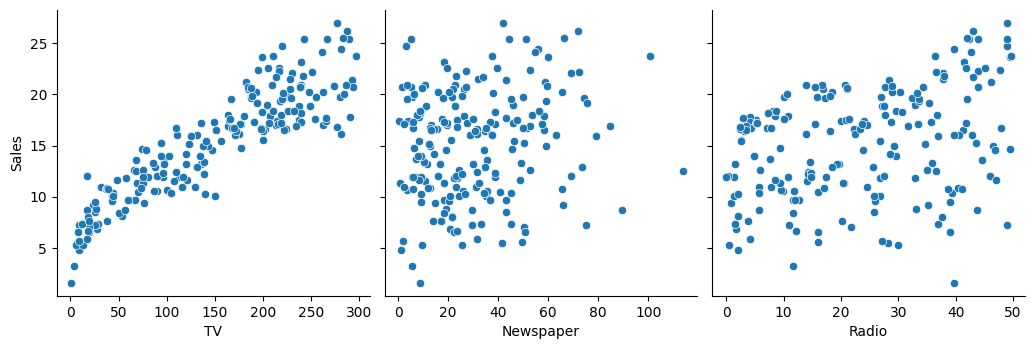

In [19]:
# Original version created by prog4321, Jun 2024 ==================================================

# [ All library/module references are listed at the top for ease of reference ] ===================

# NumPy and Pandas for data manipulation
import numpy as np
import pandas as pd

from sklearn.linear_model import LinearRegression # We will use Scikit-learn's Linear Regression model as our benchmark
from sklearn.preprocessing import StandardScaler # For standardising the dataset
from sklearn.model_selection import train_test_split # For splitting the dataset
from sklearn.metrics import mean_squared_error, r2_score # Metrics to see how well our SLR model performs

# Seaborn and Matplotlib for visualisation
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib import cm # For Colormaps


# Set Random Seed =================================================================================
# Set a random seed (any integer between 0 and 2**32 - 1 inclusive), to be used later with the
# NumPy RandomState function for random number generation. This allows for the same random
# number(s) to be generated every time the code is run, which allows for reproducibility of
# results between different code executions.
random_seed = 123


# Set the URL or file path for the CSV file that contains the dataset =============================
# (URL for the CSV download: https://www.kaggle.com/datasets/ashydv/advertising-dataset/data)
# We extract the data from the CSV file and store it in a Pandas DataFrame.
df_data = pd.read_csv(r'https://raw.githubusercontent.com/prog4321/gradient_descent/main/data/advertising.csv')


# For visualising the 1st 5 rows of the dataset, and to get a count of the rows ===================
# If you want to see the 1st 10 rows for e.g., just change it to df_advertising.head(10) etc.
print('\n', df_data.head())
print(f'\nNo. of rows in dataset: {len(df_data.index)}')


# Visualisation of media channels' advertising budget against sale volume =========================
# NB: The media channels' advertising budget is in thousands of dollars;
# Sales volume is in thousands of units.
sns.pairplot(df_data, x_vars=['TV', 'Newspaper', 'Radio'],
            y_vars='Sales', height=3.5, kind='scatter')
plt.show()

#### 12.2 Preparing the data; Creating our Simple Linear Regression model

<p style="color:brown">[ I will use Data Standardisation to prepare the data. This topic under <i>Feature Scaling</i> is beyond the scope of this notebook, but I encourage the reader to find relevant resources for further study. ]</p>

You will see that the Python class for our Simple Linear Regression model (using Batch Gradient Descent) consists of just a couple of lines of code! However, really understanding *why* gradient descent works involved a lot more effort, as we saw in the mathematical breakdown above. Some clever mathematics are put into action here.

In [20]:
# Original version created by prog4321, Jun 2024 ==================================================

# Extract the relevant columns from the dataframe =================================================
X = df_data[['TV']].values
y = df_data[['Sales']].values
# Note that X and y are now stored in 2-dimensional, N x 1 NumPy arrays, like a column vector.


# Standardise the data ============================================================================
# Standardising the dataset helps reduce the number of epochs that the gradient descent
# algorithm will require to find the bottom of the cost function valley. We will use the
# handy StandardScaler function in Scikit-learn to do this.

# Note that we use separate scalers for X and y. The reason is because we'll need to deal with
# the standardised values of TV and Sales separately, later on in the 'Example of a Sales
# volume prediction' section.
X_scaler = StandardScaler().fit(X)
y_scaler = StandardScaler().fit(y)
# We then use the respective scalers to transform the X and y datasets into their
# standardised forms.
X = X_scaler.transform(X)
y = y_scaler.transform(y)


# Allocate 70% (0.7) of the dataset for training; remaining 30% will be used for testing ==========
# Note that the 'random_seed' value (as defined near the top of the script) will affect the
# algorithm's choice of the rows that get selected for the training (and test) datasets.
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                    train_size=0.7,
                                    random_state=random_seed)


# Our own Simple Linear Regression (SLR) Model using Batch Gradient Descent =======================

# NB: The code for this class is somewhat loosely based on the code for the Adaline class using
# gradient descent in Chapter 2 of 'Python Machine Learning - 3rd edition' by Sebastian Raschka &
# Vahid Mirjalili, published by Packt. But naturally, I have made some changes here to adapt it for
# Simple Linear Regression, plus some other changes to make it more user-friendly and to provide a
# flow that matches the text in my notebook on 'Gradient Descent (A More Intuitive Explanation)'.

class LinearRegressionBGD(object):
    '''Simple Linear Regression model using Batch Gradient Descent'''

    def __init__(self, learning_rate=0.15, epoch=20, random_state=1):
        self.learning_rate = learning_rate
        self.epoch = epoch
        self.random_state = random_state

    def fit(self, X, y):

        # Get the number of rows in the training dataset
        row_count = len(y)

        # Initialise the slope (m) and intercept (b) values to small random values between 0.01 and 0.3.
        # The choice of these small restrictions is just to make it easier for the 3D visualisation
        # surface plot (used later on) to "contain" the logged values for m, b and MSE generated
        # during the gradient descent algorithm.
        r = np.random.RandomState(self.random_state)
        self.m = r.uniform(low=0.01, high=0.3)
        self.b = r.uniform(low=0.01, high=0.3)

        # Lists to log in values of m, b and MSE for every epoch
        self.m_log, self.b_log, self.mse_log = [], [], []

        for i in range(self.epoch):

            # Calculate the predicted y values (y_hat)
            y_hat = self.predict(X) # Returns an N x 1 column array

            residual = y - y_hat # Returns an N x 1 column array

            # Calculate the Mean Squared Error (MSE); we use [0] to extract the scalar value from the resulting array
            mse = (1 / row_count) * sum(residual ** 2)[0]

            # Log the values for m, b and MSE into the respective lists, for use later in the 3D visualisation section
            self.m_log.append(self.m)
            self.b_log.append(self.b)
            self.mse_log.append(mse)

            # We use the '@' operator for a dot product here, and [0,0] to extract the scalar value from the resulting array
            delta_m = self.learning_rate * (2 / row_count) * (residual.T @ X)[0,0]
            self.m += delta_m # Python shorthand for 'self.m = self.m + delta_m'

            delta_b = self.learning_rate * (2 / row_count) * sum(residual)[0]
            self.b += delta_b
        
        return self

    def predict(self, X):
        return (self.m * X) + self.b

#### 12.3 Running our Simple Linear Regression model; Viewing the results

We use Scikit-learn's Linear Regression model as our benchmark, and we compare the results.

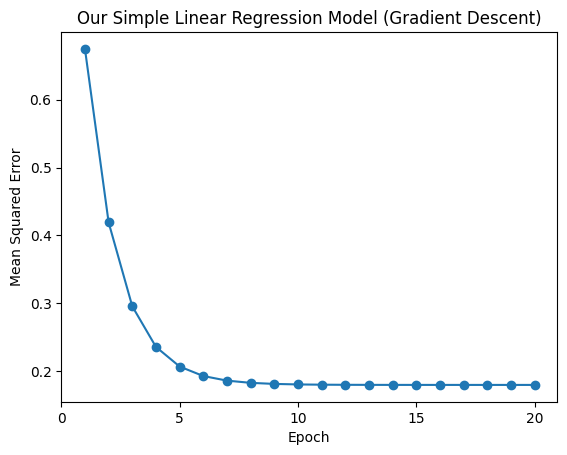

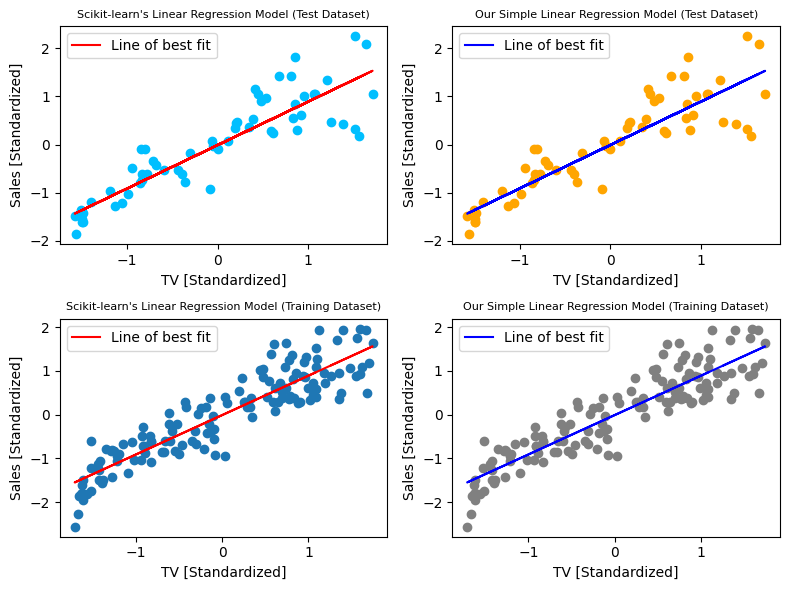


Results from Scikit-learn's Linear Regression Model:
Slope: 0.902
Intercept: -0.010
Test Dataset MSE: 0.206
Test Dataset R-squared: 78.95%
Training Dataset MSE: 0.180
Training Dataset R-squared: 82.15%

Results from Our Simple Linear Regression Model:
Slope: 0.902
Intercept: -0.010
Test Dataset MSE: 0.206
Test Dataset R-squared: 78.95%
Training Dataset MSE: 0.180
Training Dataset R-squared: 82.15%

For a TV advertising budget of $220K:
Scikit-learn's Linear Regression model predicts a Sales volume of 19.1K units.
Our Simple Linear Regression model predict a Sales volume of 19.1K units.


In [21]:
# Original version created by prog4321, Jun 2024 ==================================================

# Create an instance of Scikit-learn's Linear Regression model, and train it ======================
skl_lreg = LinearRegression()
skl_lreg.fit(X_train, y_train)


# Create an instance of our own Simple Linear Regression model, and train it ======================
mdl_lreg = LinearRegressionBGD(learning_rate=0.15, epoch=20, random_state=random_seed)
mdl_lreg.fit(X_train, y_train)


# Plot a chart to see how gradient descent leads to a reduction in MSE for every epoch ============
# Create a range of numbers from 1 to the epoch number. We will use this as
# X-axis values; the MSE values (from 'mse_log') will be the Y-axis values.
epoch_range = range(1, mdl_lreg.epoch + 1)
plt.plot(epoch_range, mdl_lreg.mse_log, marker='o')
plt.xlabel('Epoch')
plt.xticks(range(0, mdl_lreg.epoch + 1, 5)) # Creates a range of numbers from 0 to the epoch number, in steps of 5
plt.ylabel('Mean Squared Error')
plt.title('Our Simple Linear Regression Model (Gradient Descent)')
plt.show()


# Side-by-side comparison of our model and Scikit-Learn's model ===================================

# We will use Scikit-learn's Linear Regression model as our benchmark to check how well our own
# Simple Linear Regression model with batch gradient descent algorithm is performing.
# If the results are close or identical, that means our SLR model is working well.

# Get the 2 models' predictions for the test dataset:
skl_y_test_pred = skl_lreg.predict(X_test)
mdl_y_test_pred = mdl_lreg.predict(X_test)

# Get the 2 models' predictions for the training dataset:
skl_y_train_pred = skl_lreg.predict(X_train)
mdl_y_train_pred = mdl_lreg.predict(X_train)

# Visual comparison of the line of best fit between the 2 models:
fig, ax = plt.subplots(nrows=2, ncols=2, figsize=(8, 6))
font_size = 8

ax[0,0].scatter(x=X_test, y=y_test, color='deepskyblue')
ax[0,0].plot(X_test, skl_y_test_pred, color='red', label='Line of best fit') # Scikit-Learn's model, test dataset
ax[0,0].set_xlabel('TV [Standardized]')
ax[0,0].set_ylabel('Sales [Standardized]')
ax[0,0].set_title('Scikit-learn\'s Linear Regression Model (Test Dataset)', fontsize=font_size)
ax[0,0].legend(loc='upper left')

ax[0,1].scatter(x=X_test, y=y_test, color='orange')
ax[0,1].plot(X_test, mdl_y_test_pred, color='blue', label='Line of best fit') # Our SLR model, test dataset
ax[0,1].set_xlabel('TV [Standardized]')
ax[0,1].set_ylabel('Sales [Standardized]')
ax[0,1].set_title('Our Simple Linear Regression Model (Test Dataset)', fontsize=font_size)
ax[0,1].legend(loc='upper left')

ax[1,0].scatter(x=X_train, y=y_train)
ax[1,0].plot(X_train, skl_y_train_pred, color='red', label='Line of best fit') # Scikit-Learn's model, training dataset
ax[1,0].set_xlabel('TV [Standardized]')
ax[1,0].set_ylabel('Sales [Standardized]')
ax[1,0].set_title('Scikit-learn\'s Linear Regression Model (Training Dataset)', fontsize=font_size)
ax[1,0].legend(loc='upper left')

ax[1,1].scatter(x=X_train, y=y_train, color='gray')
ax[1,1].plot(X_train, mdl_y_train_pred, color='blue', label='Line of best fit') # Our SLR model, training dataset
ax[1,1].set_xlabel('TV [Standardized]')
ax[1,1].set_ylabel('Sales [Standardized]')
ax[1,1].set_title('Our Simple Linear Regression Model (Training Dataset)', fontsize=font_size)
ax[1,1].legend(loc='upper left')

plt.tight_layout()
plt.show()

# Now we compare some numerical results between the 2 models:
print('\nResults from Scikit-learn\'s Linear Regression Model:')
print('====================================================')
print(f'Slope: {skl_lreg.coef_[0,0]:.3f}')
print(f'Intercept: {skl_lreg.intercept_[0]:.3f}')
print(f'Test Dataset MSE: {mean_squared_error(y_true=y_test, y_pred=skl_y_test_pred):.3f}')
print(f'Test Dataset R-squared: {r2_score(y_true=y_test, y_pred=skl_y_test_pred):.2%}')
print(f'Training Dataset MSE: {mean_squared_error(y_true=y_train, y_pred=skl_y_train_pred):.3f}')
print(f'Training Dataset R-squared: {r2_score(y_true=y_train, y_pred=skl_y_train_pred):.2%}')

print('\nResults from Our Simple Linear Regression Model:')
print('================================================')
print(f'Slope: {mdl_lreg.m:.3f}')
print(f'Intercept: {mdl_lreg.b:.3f}')
print(f'Test Dataset MSE: {mean_squared_error(y_true=y_test, y_pred=mdl_y_test_pred):.3f}')
print(f'Test Dataset R-squared: {r2_score(y_true=y_test, y_pred=mdl_y_test_pred):.2%}')
print(f'Training Dataset MSE: {mean_squared_error(y_true=y_train, y_pred=mdl_y_train_pred):.3f}')
print(f'Training Dataset R-squared: {r2_score(y_true=y_train, y_pred=mdl_y_train_pred):.2%}')


# Example of a Sales volume prediction using these 2 models =======================================
TV = 220 # Sample advertising budget in thousands of dollars
# We have to standardise this X value prior to running the prediction. We use the X_scaler
# (previously used to standardise the X dataset values) to do this:
TV_std = X_scaler.transform([[TV]]) 

# We get the predictions, but keep in mind these values are in standardised form at the moment
skl_y_pred = skl_lreg.predict(TV_std)
mdl_y_pred = mdl_lreg.predict(TV_std)

# We then use the inverse transform operation of the y_scaler to convert these standardised prediction
# values to 'regular' Sales volume numbers in thousands of units; we use [0,0] to extract the scalar values:
skl_y_pred = y_scaler.inverse_transform(skl_y_pred)[0,0]
mdl_y_pred = y_scaler.inverse_transform(mdl_y_pred)[0,0]

print(f'\nFor a TV advertising budget of ${TV}K:')
print('=====================================')
print(f'Scikit-learn\'s Linear Regression model predicts a Sales volume of {skl_y_pred:.1f}K units.')
print(f'Our Simple Linear Regression model predict a Sales volume of {mdl_y_pred:.1f}K units.')

#### 12.4 3D Visualisation of Gradient Descent

<p style="color:brown">[ Running the code in an IDE like Microsoft VS Code will allow you to "rotate" the 3D plot using your mouse, so that you can visualise the 3D plot from different angles. ]</p>

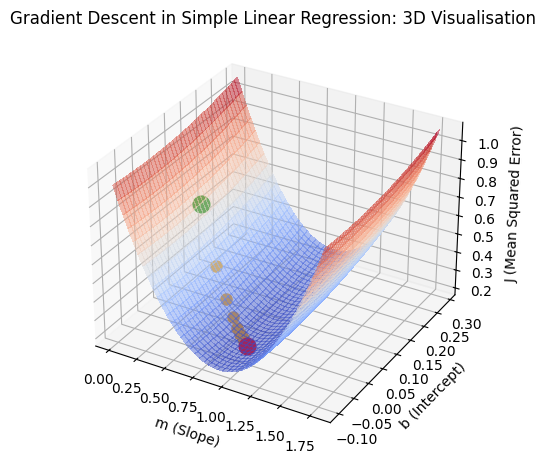


Log of values during Gradient Descent:
        Slope  Intercept       MSE
0   0.211976   0.092980  0.674619
1   0.422502   0.063247  0.419161
2   0.568817   0.042087  0.295650
3   0.670507   0.027036  0.235932
4   0.741183   0.016333  0.207056
5   0.790303   0.008726  0.193094
6   0.824443   0.003320  0.186342
7   0.848171  -0.000521  0.183076
8   0.864663  -0.003248  0.181497
9   0.876126  -0.005184  0.180734
10  0.884093  -0.006558  0.180364
11  0.889630  -0.007533  0.180186
12  0.893479  -0.008224  0.180099
13  0.896154  -0.008714  0.180057
14  0.898014  -0.009062  0.180037
15  0.899306  -0.009308  0.180027
16  0.900205  -0.009483  0.180023
17  0.900829  -0.009607  0.180020
18  0.901263  -0.009694  0.180019
19  0.901565  -0.009756  0.180019


In [22]:
# Original version created by prog4321, Jun 2024 ==================================================

# 3D Visualisation Section ========================================================================
# The code in this section will allow us to visualise in a 3D plot:
# 1. The "surface" created by multiple combinations of slope (m), intercept (b) and MSE values,
#    plotted on the X-Y-Z axes respectively, that form a "cost function" valley.
# 2. The dynamic movement from the gradient descent algorithm, that changes the m, b and MSE
#    values as we progress through the epochs. These changes are charted by some coloured dots
#    that appear on the cost function valley.

# We'll create a 3D plot
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

# This function calculates and returns the MSE values required for creating the 3D plot.
def mse_calc(X, y, m, b):
    residual = y - (m * X) - b
    return (1 / len(y)) * sum(residual ** 2)[0]

# This defines the range of m and b values to be used in the 3D plot.
# I have selected these particular values so that the 3D surface of the valley can "contain" the
# coloured dots that represent the movement from the initial m, b and MSE values to the
# final m, b and MSE values.
m_range = np.arange(0.01, 1.8, 0.01)
b_range = np.arange(-0.1, 0.3, 0.01)

m_plot, b_plot = np.meshgrid(m_range, b_range)
# The meshgrid function above produces the following results for m_plot:
# [[0.01 0.02 0.03 ... 1.77 1.78 1.79]
#  [0.01 0.02 0.03 ... 1.77 1.78 1.79]
#  [0.01 0.02 0.03 ... 1.77 1.78 1.79]
#  ...
#  [0.01 0.02 0.03 ... 1.77 1.78 1.79]
#  [0.01 0.02 0.03 ... 1.77 1.78 1.79]
#  [0.01 0.02 0.03 ... 1.77 1.78 1.79]]
# Visualise the "column values" as X-axis values for m, with the range of values defined by 'm_range'.
# The number of rows in this array will the same as the *length* of 'b_range'.

# And the following results for b_plot:
# [[-0.1  -0.1  -0.1  ... -0.1  -0.1  -0.1 ]
#  [-0.09 -0.09 -0.09 ... -0.09 -0.09 -0.09]
#  [-0.08 -0.08 -0.08 ... -0.08 -0.08 -0.08]
#  ...
#  [ 0.27  0.27  0.27 ...  0.27  0.27  0.27]
#  [ 0.28  0.28  0.28 ...  0.28  0.28  0.28]
#  [ 0.29  0.29  0.29 ...  0.29  0.29  0.29]]
# Visualise the "row values" as Y-axis values for b, with the range of values defined by 'b_range'.
# The number of columns in this array will the same as the *length* of 'm_range'.

# Used together, these 2 arrays give us numerous pairs of m and b values that
# can be visualised as a mesh on the m-b plane (hence the term meshgrid).
# You can try to visualise the mesh as a rectangle containing m-b value pairs
# bound by the four Cartesian coordinates below:

# (0.01, 0.29)..........(1.79, 0.29)
# ..................................
# ..................................
# ..................................
# ..................................
# ..................................
# ..................................
# ..................................
# (0.01, -0.1)..........(1.79, -0.1)

# But these m and b values are not sufficient to make a 3D plot of the valley yet, as we are
# still missing the corresponding MSE values (to be represented on the Z-axis). We'd need to
# do some more steps to get the corresponding MSE values.

# First, we need to "flatten" the m_plot and b_plot arrays using the Ravel function.
# Doing this results in all the values in m_plot returned in a single 1 x n array;
# the same goes for b_plot.

# For e.g. if we have a 2 x 3 array named arr:
# >>> arr = np.array([[1,2,3],[4,5,6]])
# >>> print(arr)
# [[1 2 3]
#  [4 5 6]]
# >>> print(np.ravel(arr))
# [1 2 3 4 5 6]

# We do this in preparation to "feed" the m_plot and b_plot values into the 'mse_calc' function later,
# which allows us to get the corresponding MSE values for those combinations of m and b values.
m_plot_flat, b_plot_flat = np.ravel(m_plot), np.ravel(b_plot)

# We run a loop to feed 'mse_calc' to get the corresponding MSE values.
# The result is stored in a 1 x n array.
mse_plot = np.array([mse_calc(X_train, y_train, m, b)
            for m, b in zip(m_plot_flat, b_plot_flat)])

# We have to reshape this mse_plot (a 1 x n array) into the m_plot shape (which is the same as the
# b_plot shape), as the 'plot_surface' function that we'll use later on requires the m, b and MSE
# values to be inside 3 separate arrays all of the same shape.
mse_plot = mse_plot.reshape(m_plot.shape)

# Now that we have the m, b and MSE values in 3 arrays of the same shape, and we feed that into the
# 'plot_surface' function that renders those values into a surface that represents
# the cost function valley.
# 1. 'alpha' value controls the opacity of the valley surface (1 is fully opaque). We set it to 0.5
#    as we want it to be fairly translucent to make it easier for view the coloured dots later.
# 2. 'cmap' value is the Matplotlib colormap. You can choose to use a different colormap:
#    https://matplotlib.org/stable/users/explain/colors/colormaps.html
# 3. Set 'antialiased' to False for faster performance, or True for better graphics rendering.

ax.plot_surface(m_plot, b_plot, mse_plot, alpha=0.5, cmap=cm.coolwarm, antialiased=False)

# Plot the dots that chart the gradient descent path down the cost function valley.
for i in range(mdl_lreg.epoch):
    if i == 0: # For the 1st entry in the log, we colour it green to indicate the start
        ax.plot(mdl_lreg.m_log[i], mdl_lreg.b_log[i], mdl_lreg.mse_log[i], marker='o', color='green', markersize=12)

    elif i == (mdl_lreg.epoch - 1): # For the last entry in the log, we colour it red to indicate the end
        ax.plot(mdl_lreg.m_log[i], mdl_lreg.b_log[i], mdl_lreg.mse_log[i], marker='o', color='red', markersize=12)
        
    else: # All the intermediate dots are coloured orange and sized slightly smaller
        ax.plot(mdl_lreg.m_log[i], mdl_lreg.b_log[i], mdl_lreg.mse_log[i], marker='o', color='orange', markersize=8)

# Reduce the amount of whitespace around the 3D plot and position it more aesthetically
fig.subplots_adjust(left=0, right=1, bottom=0.05, top=0.92)

ax.set_xlabel('m (Slope)')
ax.set_ylabel('b (Intercept)')
ax.set_zlabel('J (Mean Squared Error)')
ax.set_title('Gradient Descent in Simple Linear Regression: 3D Visualisation')

plt.show()


# Display the log of values during Gradient Descent ===============================================
# Transpose the log lists into N x 1 (column) arrays
m, b, mse = np.array([mdl_lreg.m_log]).T, np.array([mdl_lreg.b_log]).T, np.array([mdl_lreg.mse_log]).T
# Stack the N x 1 arrays side by side ("horizontally") into an N x 3 array
log = np.hstack((m, b, mse))
# Convert the result into a Pandas DataFrame for a more user-friendly presentation
df_log = pd.DataFrame(log, columns=['Slope', 'Intercept', 'MSE'])
print('\nLog of values during Gradient Descent:\n', df_log)

# NB: The FINAL slope and intercept values (self.m and self.b) will be a little different from the
# last m and b entries in the log lists. As self.m and self.b are further updated with delta_m
# and delta_b respectively, *after* the last m and b entries are made in the log lists.

#### <ins>13. CLOSING THOUGHTS</ins>

If you have made it this far, thank you for taking the time! I hope you have found this notebook useful.